In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "E:\\LAI_prediction_2000to2020\\Merged_Data2002to2020NDVI.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[data.index.year <= 2015]
test_data = data[data.index.year > 2015]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0:2])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)

look_back = 1
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=4, verbose=2)

Index(['date', 'GPP', 'NDVI', 'LAI1', 'LAI2', 'LAI3',
       'dewpoint_2m_temperature', 'maximum_2m_air_temperature',
       'mean_2m_air_temperature', 'minimum_2m_air_temperature',
       'surface_pressure', 'total_precipitation', 'u_component_of_wind_10m',
       'v_component_of_wind_10m'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/500
77/77 - 4s - loss: 0.0712
Epoch 2/500
77/77 - 0s - loss: 0.0313
Epoch 3/500
77/77 - 0s - loss: 0.0259
Epoch 4/500
77/77 - 0s - loss: 0.0225
Epoch 5/500
77/77 - 0s - loss: 0.0197
Epoch 6/500
77/77 - 0s - loss: 0.0187
Epoch 7/500
77/77 - 0s - loss: 0.0181
Epoch 8/500
77/77 - 0s - loss: 0.0177
Epoch 9/500
77/77 - 0s - loss: 0.0175
Epoch 10/500
77/77 - 0s - loss: 0.0175
Epoch 11/500
77/77 - 0s - loss: 0.0172
Epoch 12/500
77/77 - 0s - loss: 0.0167
Epoch 13/500
77/77 - 0s - loss: 0.0167
Epoch 14/500
77/77 - 0s - loss: 0.0170
Epoch 15/500
77/77 - 0s - loss: 0.0167
Epoch 16/5

77/77 - 0s - loss: 0.0131
Epoch 199/500
77/77 - 0s - loss: 0.0130
Epoch 200/500
77/77 - 0s - loss: 0.0137
Epoch 201/500
77/77 - 0s - loss: 0.0132
Epoch 202/500
77/77 - 0s - loss: 0.0129
Epoch 203/500
77/77 - 0s - loss: 0.0129
Epoch 204/500
77/77 - 0s - loss: 0.0129
Epoch 205/500
77/77 - 0s - loss: 0.0129
Epoch 206/500
77/77 - 0s - loss: 0.0136
Epoch 207/500
77/77 - 0s - loss: 0.0130
Epoch 208/500
77/77 - 0s - loss: 0.0132
Epoch 209/500
77/77 - 0s - loss: 0.0129
Epoch 210/500
77/77 - 0s - loss: 0.0128
Epoch 211/500
77/77 - 0s - loss: 0.0129
Epoch 212/500
77/77 - 0s - loss: 0.0130
Epoch 213/500
77/77 - 0s - loss: 0.0128
Epoch 214/500
77/77 - 0s - loss: 0.0133
Epoch 215/500
77/77 - 0s - loss: 0.0130
Epoch 216/500
77/77 - 0s - loss: 0.0131
Epoch 217/500
77/77 - 0s - loss: 0.0133
Epoch 218/500
77/77 - 0s - loss: 0.0130
Epoch 219/500
77/77 - 0s - loss: 0.0128
Epoch 220/500
77/77 - 0s - loss: 0.0134
Epoch 221/500
77/77 - 0s - loss: 0.0128
Epoch 222/500
77/77 - 0s - loss: 0.0135
Epoch 223/500


77/77 - 0s - loss: 0.0115
Epoch 404/500
77/77 - 0s - loss: 0.0115
Epoch 405/500
77/77 - 0s - loss: 0.0111
Epoch 406/500
77/77 - 0s - loss: 0.0112
Epoch 407/500
77/77 - 0s - loss: 0.0114
Epoch 408/500
77/77 - 0s - loss: 0.0109
Epoch 409/500
77/77 - 0s - loss: 0.0110
Epoch 410/500
77/77 - 0s - loss: 0.0111
Epoch 411/500
77/77 - 0s - loss: 0.0112
Epoch 412/500
77/77 - 0s - loss: 0.0113
Epoch 413/500
77/77 - 0s - loss: 0.0110
Epoch 414/500
77/77 - 0s - loss: 0.0112
Epoch 415/500
77/77 - 0s - loss: 0.0112
Epoch 416/500
77/77 - 0s - loss: 0.0111
Epoch 417/500
77/77 - 0s - loss: 0.0109
Epoch 418/500
77/77 - 0s - loss: 0.0111
Epoch 419/500
77/77 - 0s - loss: 0.0113
Epoch 420/500
77/77 - 0s - loss: 0.0112
Epoch 421/500
77/77 - 0s - loss: 0.0111
Epoch 422/500
77/77 - 0s - loss: 0.0109
Epoch 423/500
77/77 - 0s - loss: 0.0110
Epoch 424/500
77/77 - 0s - loss: 0.0109
Epoch 425/500
77/77 - 0s - loss: 0.0108
Epoch 426/500
77/77 - 0s - loss: 0.0110
Epoch 427/500
77/77 - 0s - loss: 0.0113
Epoch 428/500


In [17]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [18]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict[:, 0:3]))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict[:, 0:3]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

Train RMSE: 0.124
Test RMSE: 0.129


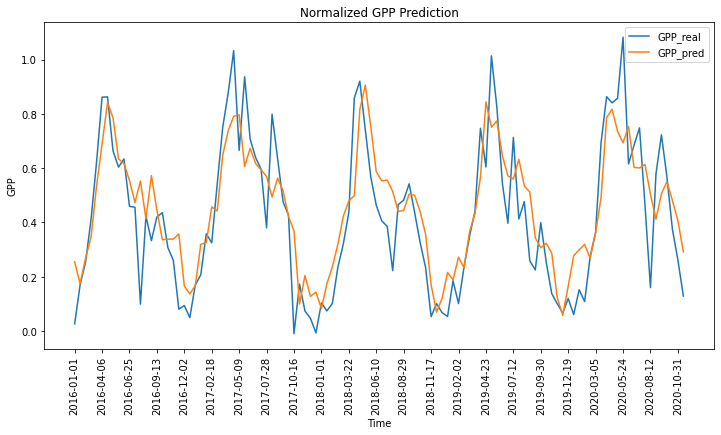

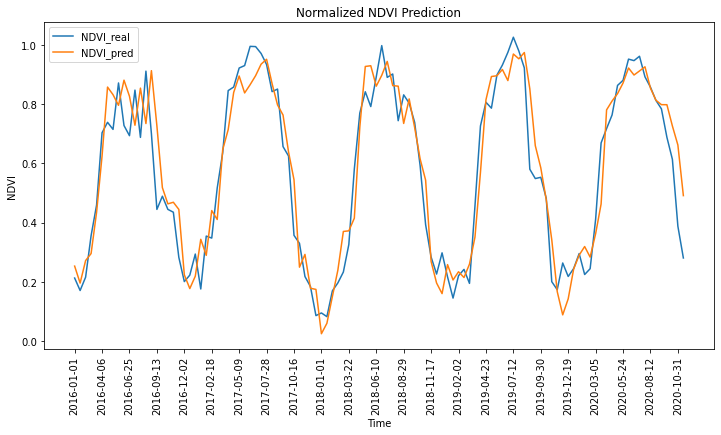

In [20]:
# Extract predicted and actual values for each variable
GPP_real, NDVI_real = y_test[:, 0], y_test[:, 1]
GPP_pred, NDVI_pred = test_predict[:, 0], test_predict[:, 1]


# Plot GPP
plt.figure(figsize=(12, 6))
plt.plot(GPP_real, label='GPP_real')
plt.plot(GPP_pred, label='GPP_pred')
plt.title('Normalized GPP Prediction')
plt.xlabel('Time')
plt.ylabel('GPP')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.legend()
plt.show()

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "H:\\LAI_prediction_2000to2020\\Merged_Data2002to2020_no.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[data.index.year <= 2015]
test_data = data[data.index.year > 2015]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

# Prepare data for LSTM
def create_dataset(data, look_back=8):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 0:1])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)

look_back = 8
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

Index(['date', 'NDVI', 'dewpoint_2m_temperature', 'maximum_2m_air_temperature',
       'mean_2m_air_temperature', 'minimum_2m_air_temperature',
       'surface_pressure', 'total_precipitation', 'u_component_of_wind_10m',
       'v_component_of_wind_10m'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/100
19/19 - 3s - loss: 0.1531 - 3s/epoch - 172ms/step
Epoch 2/100
19/19 - 0s - loss: 0.0702 - 81ms/epoch - 4ms/step
Epoch 3/100
19/19 - 0s - loss: 0.0501 - 81ms/epoch - 4ms/step
Epoch 4/100
19/19 - 0s - loss: 0.0414 - 82ms/epoch - 4ms/step
Epoch 5/100
19/19 - 0s - loss: 0.0336 - 77ms/epoch - 4ms/step
Epoch 6/100
19/19 - 0s - loss: 0.0242 - 82ms/epoch - 4ms/step
Epoch 7/100
19/19 - 0s - loss: 0.0178 - 80ms/epoch - 4ms/step
Epoch 8/100
19/19 - 0s - loss: 0.0142 - 75ms/epoch - 4ms/step
Epoch 9/100
19/19 - 0s - loss: 0.0145 - 79ms/epoch - 4ms/step
Epoch 10/100
19/19 - 0s - loss: 0.0133 - 86ms/epoch - 5ms/step
Epo

In [6]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict[:]))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict[:]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')

4/4 [==============================] - 0s 2ms/step
Train RMSE: 0.075
Test RMSE: 0.104


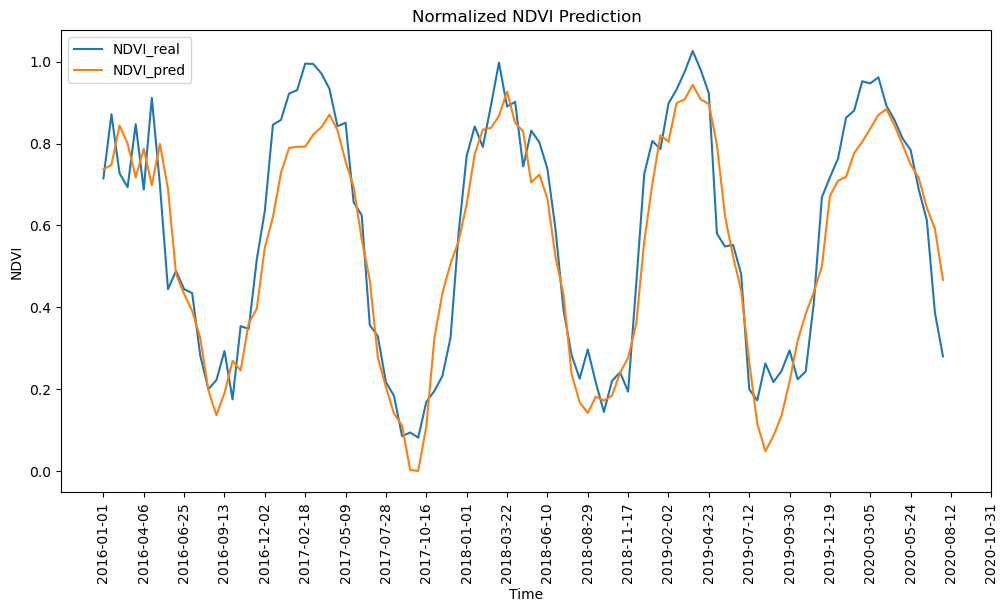

In [8]:
# Extract predicted and actual values for each variable
NDVI_real = y_test[:, 0]
NDVI_pred = test_predict[:, 0]


# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "H:\\LAI_prediction_2000to2020\\Merged_Data2002to2020_no.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[data.index.year <= 2015]
test_data = data[data.index.year > 2015]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

def create_dataset(data, look_back=8):
    X, Y = [], []
    for i in range(look_back, len(data) - 1):
        a = data[i-look_back:i, 1:]
        b = data[i-look_back:i, 0:1]
        c = np.concatenate((a, b), axis=1)
        X.append(c)
        Y.append(data[i, 0:1])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)


look_back = 8
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

Index(['date', 'NDVI', 'dewpoint_2m_temperature', 'maximum_2m_air_temperature',
       'mean_2m_air_temperature', 'minimum_2m_air_temperature',
       'surface_pressure', 'total_precipitation', 'u_component_of_wind_10m',
       'v_component_of_wind_10m'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/100
19/19 - 3s - loss: 0.0991 - 3s/epoch - 145ms/step
Epoch 2/100
19/19 - 0s - loss: 0.0557 - 112ms/epoch - 6ms/step
Epoch 3/100
19/19 - 0s - loss: 0.0311 - 115ms/epoch - 6ms/step
Epoch 4/100
19/19 - 0s - loss: 0.0161 - 111ms/epoch - 6ms/step
Epoch 5/100
19/19 - 0s - loss: 0.0126 - 115ms/epoch - 6ms/step
Epoch 6/100
19/19 - 0s - loss: 0.0123 - 121ms/epoch - 6ms/step
Epoch 7/100
19/19 - 0s - loss: 0.0112 - 101ms/epoch - 5ms/step
Epoch 8/100
19/19 - 0s - loss: 0.0108 - 100ms/epoch - 5ms/step
Epoch 9/100
19/19 - 0s - loss: 0.0103 - 106ms/epoch - 6ms/step
Epoch 10/100
19/19 - 0s - loss: 0.0097 - 114ms/epoch - 6ms

4/4 [==============================] - 0s 3ms/step
Train RMSE: 0.070
Test RMSE: 0.102


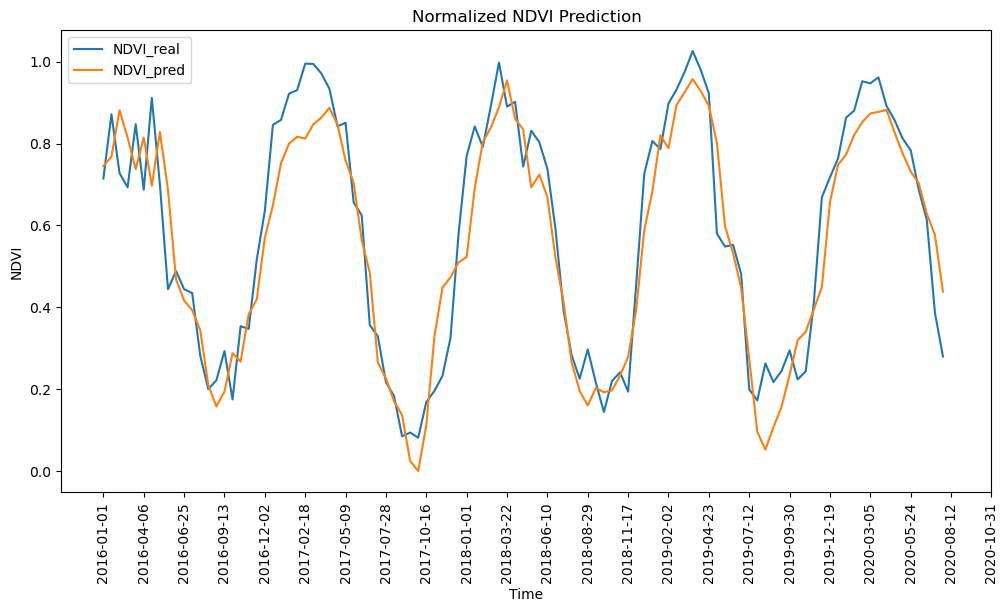

In [15]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predict[:]))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict[:]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
# Extract predicted and actual values for each variable
NDVI_real = y_test[:, 0]
NDVI_pred = test_predict[:, 0]

# Plot NDVI
plt.figure(figsize=(12, 6))
plt.plot(NDVI_real, label='NDVI_real')
plt.plot(NDVI_pred, label='NDVI_pred')
plt.title('Normalized NDVI Prediction')
tick_frequency = 5
plt.xticks(range(0, len(test_data.index), tick_frequency), test_data.index[::tick_frequency].strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Time')
plt.ylabel('NDVI')
plt.legend()
plt.show()

Epoch 1/100
26/26 - 0s - loss: 0.0068 - 132ms/epoch - 5ms/step
Epoch 2/100
26/26 - 0s - loss: 0.0079 - 150ms/epoch - 6ms/step
Epoch 3/100
26/26 - 0s - loss: 0.0070 - 154ms/epoch - 6ms/step
Epoch 4/100
26/26 - 0s - loss: 0.0064 - 159ms/epoch - 6ms/step
Epoch 5/100
26/26 - 0s - loss: 0.0070 - 181ms/epoch - 7ms/step
Epoch 6/100
26/26 - 0s - loss: 0.0066 - 154ms/epoch - 6ms/step
Epoch 7/100
26/26 - 0s - loss: 0.0062 - 151ms/epoch - 6ms/step
Epoch 8/100
26/26 - 0s - loss: 0.0061 - 146ms/epoch - 6ms/step
Epoch 9/100
26/26 - 0s - loss: 0.0058 - 139ms/epoch - 5ms/step
Epoch 10/100
26/26 - 0s - loss: 0.0059 - 145ms/epoch - 6ms/step
Epoch 11/100
26/26 - 0s - loss: 0.0068 - 137ms/epoch - 5ms/step
Epoch 12/100
26/26 - 0s - loss: 0.0060 - 157ms/epoch - 6ms/step
Epoch 13/100
26/26 - 0s - loss: 0.0055 - 153ms/epoch - 6ms/step
Epoch 14/100
26/26 - 0s - loss: 0.0058 - 139ms/epoch - 5ms/step
Epoch 15/100
26/26 - 0s - loss: 0.0058 - 135ms/epoch - 5ms/step
Epoch 16/100
26/26 - 0s - loss: 0.0057 - 194ms/ep

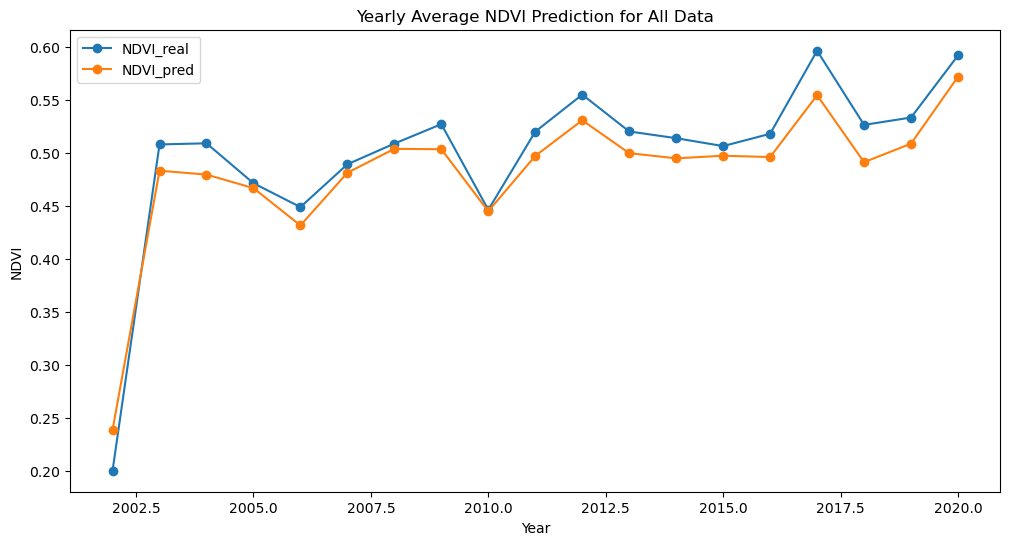

In [25]:
# Use all data for both training and prediction
train_data_all = data
train_data_normalized_all = scaler.fit_transform(train_data_all)
X_all, y_all = create_dataset(train_data_normalized_all, look_back)

# Train the model on all data
model.fit(X_all, y_all, epochs=100, batch_size=16, verbose=2)

# Make predictions on all data
all_predict = model.predict(X_all)

# Extract actual and predicted NDVI values for all data
NDVI_real_all = y_all[:, 0]
NDVI_pred_all = all_predict[:, 0]

# Create a DataFrame with the correct date index for all predictions
prediction_dates_all = data.index[look_back + 1:]
prediction_df_all = pd.DataFrame(index=prediction_dates_all)
prediction_df_all['NDVI_real'] = NDVI_real_all
prediction_df_all['NDVI_pred'] = NDVI_pred_all

# Group all predictions and actual values by year
prediction_df_yearly_all = prediction_df_all.groupby(prediction_df_all.index.year).mean()

# Plot yearly average NDVI for all data
plt.figure(figsize=(12, 6))
plt.plot(prediction_df_yearly_all.index, prediction_df_yearly_all['NDVI_real'], label='NDVI_real', marker='o')
plt.plot(prediction_df_yearly_all.index, prediction_df_yearly_all['NDVI_pred'], label='NDVI_pred', marker='o')
plt.title('Yearly Average NDVI Prediction for All Data')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.legend()
plt.show()


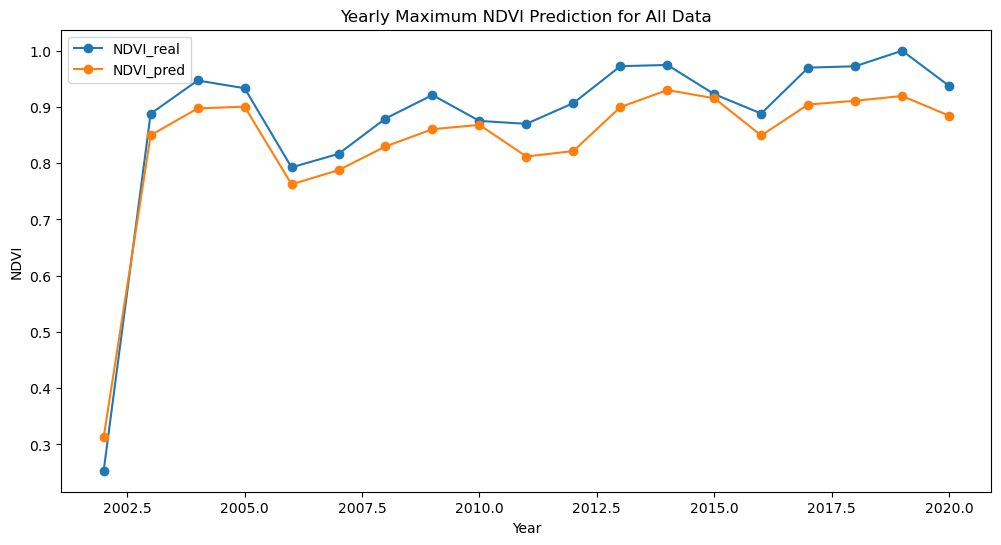

In [28]:
# Group all predictions and actual values by year
prediction_df_yearly_all = prediction_df_all.groupby(prediction_df_all.index.year).max()

# Plot yearly average NDVI for all data
plt.figure(figsize=(12, 6))
plt.plot(prediction_df_yearly_all.index, prediction_df_yearly_all['NDVI_real'], label='NDVI_real', marker='o')
plt.plot(prediction_df_yearly_all.index, prediction_df_yearly_all['NDVI_pred'], label='NDVI_pred', marker='o')
plt.title('Yearly Maximum NDVI Prediction for All Data')
plt.xlabel('Year')
plt.ylabel('NDVI')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('H:\\fluxnet\\DD_2014-2015.csv', delimiter='\t')

# 将-9999替换为0
df = df.replace(-9999, 0)

# 打印前三行
print(df.head(3))

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "H:\\fluxnet\\WW_2014-2015.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data = data.set_index('TIMESTAMP')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[:int(len(data)*0.75)]
test_data = data[int(len(data)*0.75):]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

def create_dataset(data, look_back=8):
    X, Y = [], []
    for i in range(look_back, len(data) - 1):
        a = data[i-look_back:i, 0:5]
        b = data[i-look_back:i, 5:]
        c = np.concatenate((a, b), axis=1)
        X.append(c)
        Y.append(data[i, 0:5])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)


look_back = 8
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(300, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(5))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

Index(['TIMESTAMP', 'NEE_VUT_REF', 'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF',
       'RECO_DT_VUT_REF', 'GPP_DT_VUT_REF', 'TA_F', 'SW_IN_POT', 'SW_IN_F',
       'LW_IN_F', 'VPD_F', 'PA_F', 'P_F', 'WS_F', 'USTAR', 'LE_F_MDS',
       'H_F_MDS'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/200
3/3 - 2s - loss: 0.0978 - 2s/epoch - 622ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0443 - 52ms/epoch - 17ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0280 - 49ms/epoch - 16ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0224 - 50ms/epoch - 17ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0255 - 51ms/epoch - 17ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0219 - 48ms/epoch - 16ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0197 - 49ms/epoch - 16ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0194 - 50ms/epoch - 17ms/step
Epoch 9/200
3/3 - 0s - loss: 0.0213 - 50ms/epoch - 17ms/step
Epoch 10/200
3/3 - 0s - loss: 0.0196 - 49ms/epoch - 16ms/step
Epoch 11/200
3/3 - 0s - loss: 0.

3/3 - 0s - loss: 0.0084 - 48ms/epoch - 16ms/step
Epoch 128/200
3/3 - 0s - loss: 0.0095 - 54ms/epoch - 18ms/step
Epoch 129/200
3/3 - 0s - loss: 0.0072 - 49ms/epoch - 16ms/step
Epoch 130/200
3/3 - 0s - loss: 0.0084 - 53ms/epoch - 18ms/step
Epoch 131/200
3/3 - 0s - loss: 0.0071 - 53ms/epoch - 18ms/step
Epoch 132/200
3/3 - 0s - loss: 0.0061 - 52ms/epoch - 17ms/step
Epoch 133/200
3/3 - 0s - loss: 0.0067 - 57ms/epoch - 19ms/step
Epoch 134/200
3/3 - 0s - loss: 0.0061 - 56ms/epoch - 19ms/step
Epoch 135/200
3/3 - 0s - loss: 0.0062 - 50ms/epoch - 17ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0064 - 50ms/epoch - 17ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0060 - 48ms/epoch - 16ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0057 - 46ms/epoch - 15ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0059 - 49ms/epoch - 16ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0064 - 51ms/epoch - 17ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0063 - 54ms/epoch - 18ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0070 - 52ms/epoch - 17ms/step
Epoch 

In [59]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
data_path = "H:\\fluxnet\\DD.csv"
data = pd.read_csv(data_path)
print(data.columns)

# Preprocess data
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data = data.set_index('TIMESTAMP')
print('Preprocess data finished!')


# Split into training and testing sets
train_data = data[:int(len(data)*0.75)]
test_data = data[int(len(data)*0.75):]
print('Split into training and testing sets finished!')


# Normalize data
scaler = MinMaxScaler()
train_data_normalized = scaler.fit_transform(train_data)
test_data_normalized = scaler.transform(test_data)
print('Normalize data finished!')

def create_dataset(data, look_back=8):
    X, Y = [], []
    for i in range(look_back, len(data) - 1):
        a = data[i-look_back:i, 0:5]
        b = data[i-look_back:i, 5:]
        c = np.concatenate((a, b), axis=1)
        X.append(c)
        Y.append(data[i, 0:5])  # GPP, LAI, NDVI columns
    return np.array(X), np.array(Y)


look_back = 8
X_train, y_train = create_dataset(train_data_normalized, look_back)
X_test, y_test = create_dataset(test_data_normalized, look_back)

# Create LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(5))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=2)

Index(['TIMESTAMP', 'NEE_VUT_REF', 'RECO_NT_VUT_REF', 'GPP_NT_VUT_REF',
       'RECO_DT_VUT_REF', 'GPP_DT_VUT_REF', 'TA_F', 'SW_IN_POT', 'SW_IN_F',
       'LW_IN_F', 'VPD_F', 'PA_F', 'P_F', 'WS_F', 'USTAR', 'CO2_F_MDS'],
      dtype='object')
Preprocess data finished!
Split into training and testing sets finished!
Normalize data finished!
Epoch 1/200
43/43 - 2s - loss: 0.0342 - 2s/epoch - 47ms/step
Epoch 2/200
43/43 - 0s - loss: 0.0100 - 216ms/epoch - 5ms/step
Epoch 3/200
43/43 - 0s - loss: 0.0082 - 198ms/epoch - 5ms/step
Epoch 4/200
43/43 - 0s - loss: 0.0076 - 199ms/epoch - 5ms/step
Epoch 5/200
43/43 - 0s - loss: 0.0070 - 192ms/epoch - 4ms/step
Epoch 6/200
43/43 - 0s - loss: 0.0067 - 215ms/epoch - 5ms/step
Epoch 7/200
43/43 - 0s - loss: 0.0063 - 198ms/epoch - 5ms/step
Epoch 8/200
43/43 - 0s - loss: 0.0063 - 213ms/epoch - 5ms/step
Epoch 9/200
43/43 - 0s - loss: 0.0060 - 198ms/epoch - 5ms/step
Epoch 10/200
43/43 - 0s - loss: 0.0055 - 207ms/epoch - 5ms/step
Epoch 11/200
43/43 - 0s - loss

Epoch 124/200
43/43 - 0s - loss: 0.0028 - 225ms/epoch - 5ms/step
Epoch 125/200
43/43 - 0s - loss: 0.0026 - 228ms/epoch - 5ms/step
Epoch 126/200
43/43 - 0s - loss: 0.0027 - 216ms/epoch - 5ms/step
Epoch 127/200
43/43 - 0s - loss: 0.0027 - 207ms/epoch - 5ms/step
Epoch 128/200
43/43 - 0s - loss: 0.0027 - 205ms/epoch - 5ms/step
Epoch 129/200
43/43 - 0s - loss: 0.0027 - 205ms/epoch - 5ms/step
Epoch 130/200
43/43 - 0s - loss: 0.0027 - 206ms/epoch - 5ms/step
Epoch 131/200
43/43 - 0s - loss: 0.0026 - 206ms/epoch - 5ms/step
Epoch 132/200
43/43 - 0s - loss: 0.0026 - 203ms/epoch - 5ms/step
Epoch 133/200
43/43 - 0s - loss: 0.0026 - 207ms/epoch - 5ms/step
Epoch 134/200
43/43 - 0s - loss: 0.0026 - 211ms/epoch - 5ms/step
Epoch 135/200
43/43 - 0s - loss: 0.0026 - 206ms/epoch - 5ms/step
Epoch 136/200
43/43 - 0s - loss: 0.0026 - 204ms/epoch - 5ms/step
Epoch 137/200
43/43 - 0s - loss: 0.0026 - 194ms/epoch - 5ms/step
Epoch 138/200
43/43 - 0s - loss: 0.0025 - 197ms/epoch - 5ms/step
Epoch 139/200
43/43 - 0s 

In [60]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict[:]))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict[:]))
print(f'Train RMSE: {train_rmse:.3f}')
print(f'Test RMSE: {test_rmse:.3f}')
# Extract predicted and actual values for each variable

14/14 [==============================] - 0s 3ms/step
Train RMSE: 0.041
Test RMSE: 0.126


14/14 [==============================] - 0s 3ms/step


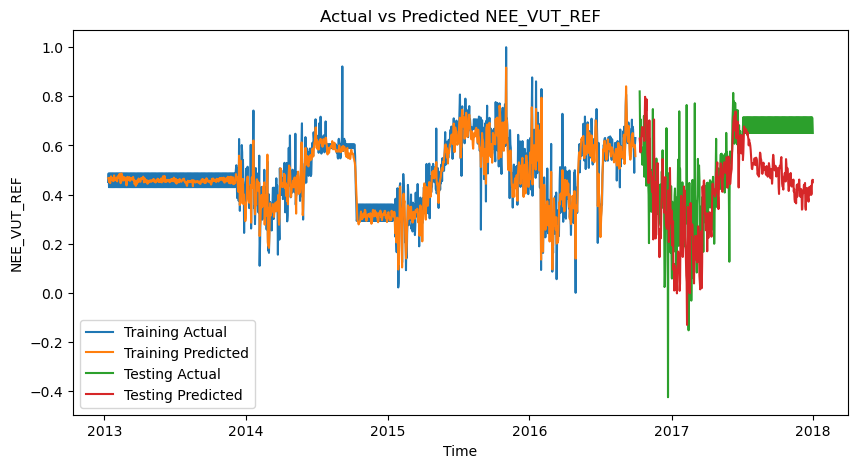

In [71]:
# Make predictions for the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

test_actual_df = y_test[:, 0]
test_pred_df = test_predict[:, 0]
train_actual_df = y_train[:, 0]
train_pred_df = train_predict[:, 0]

# Create DataFrames with the correct date indexes
train_pred_df = pd.DataFrame(train_pred_df[:-1], index=train_data.index[look_back+2:], columns=['NEE_VUT_REF_pred'])
train_actual_df = pd.DataFrame(train_actual_df[:-1], index=train_data.index[look_back+2:], columns=['NEE_VUT_REF_real'])
test_pred_df = pd.DataFrame(test_pred_df[:-1], index=test_data.index[look_back+2:], columns=['NEE_VUT_REF_pred'])
test_actual_df = pd.DataFrame(test_actual_df[:-1], index=test_data.index[look_back+2:], columns=['NEE_VUT_REF_real'])

# Plot index for both training and test data
plt.figure(figsize=(10,5))
plt.plot(train_actual_df.index, train_actual_df['NEE_VUT_REF_real'], label='Training Actual')
plt.plot(train_pred_df.index, train_pred_df['NEE_VUT_REF_pred'], label='Training Predicted')
plt.plot(test_actual_df.index, test_actual_df['NEE_VUT_REF_real'], label='Testing Actual')
plt.plot(test_pred_df.index, test_pred_df['NEE_VUT_REF_pred'], label='Testing Predicted')
plt.title('Actual vs Predicted NEE_VUT_REF')
plt.xlabel('Time')
plt.ylabel('NEE_VUT_REF')
plt.legend()
plt.show()


14/14 [==============================] - 0s 3ms/step


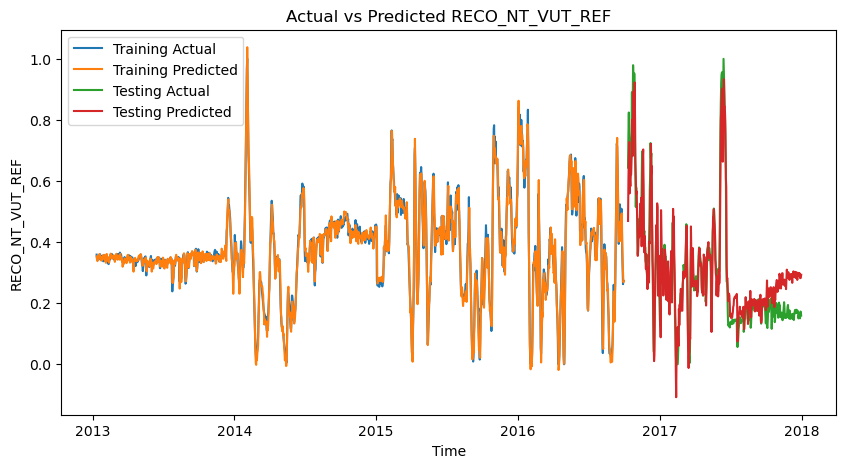

In [62]:
# Make predictions for the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

test_actual_df = y_test[:, 1]
test_pred_df = test_predictions[:, 1]
train_actual_df = y_train[:, 1]
train_pred_df = train_predictions[:, 1]

# Create DataFrames with the correct date indexes
train_pred_df = pd.DataFrame(train_pred_df[:-1], index=train_data.index[look_back+2:], columns=['RECO_NT_VUT_REFF_pred'])
train_actual_df = pd.DataFrame(train_actual_df[:-1], index=train_data.index[look_back+2:], columns=['RECO_NT_VUT_REF_real'])
test_pred_df = pd.DataFrame(test_pred_df[:-1], index=test_data.index[look_back+2:], columns=['RECO_NT_VUT_REFF_pred'])
test_actual_df = pd.DataFrame(test_actual_df[:-1], index=test_data.index[look_back+2:], columns=['RECO_NT_VUT_REF_real'])

# Plot index for both training and test data
plt.figure(figsize=(10,5))
plt.plot(train_actual_df.index, train_actual_df['RECO_NT_VUT_REF_real'], label='Training Actual')
plt.plot(train_pred_df.index, train_pred_df['RECO_NT_VUT_REFF_pred'], label='Training Predicted')
plt.plot(test_actual_df.index, test_actual_df['RECO_NT_VUT_REF_real'], label='Testing Actual')
plt.plot(test_pred_df.index, test_pred_df['RECO_NT_VUT_REFF_pred'], label='Testing Predicted')
plt.title('Actual vs Predicted RECO_NT_VUT_REF')
plt.xlabel('Time')
plt.ylabel('RECO_NT_VUT_REF')
plt.legend()
plt.show()

14/14 [==============================] - 0s 3ms/step


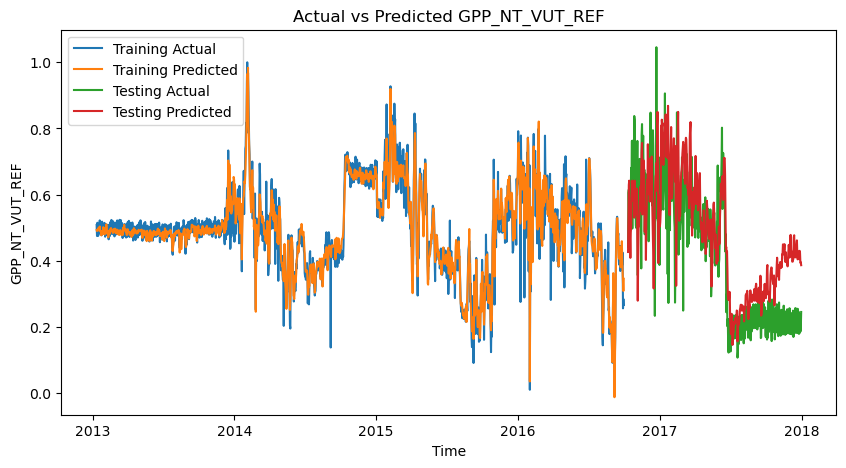

In [63]:
# Make predictions for the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

test_actual_df = y_test[:, 2]
test_pred_df = test_predictions[:, 2]
train_actual_df = y_train[:, 2]
train_pred_df = train_predictions[:, 2]

# Create DataFrames with the correct date indexes
train_pred_df = pd.DataFrame(train_pred_df[:-1], index=train_data.index[look_back+2:], columns=['GPP_NT_VUT_REF_pred'])
train_actual_df = pd.DataFrame(train_actual_df[:-1], index=train_data.index[look_back+2:], columns=['GPP_NT_VUT_REF_real'])
test_pred_df = pd.DataFrame(test_pred_df[:-1], index=test_data.index[look_back+2:], columns=['GPP_NT_VUT_REF_pred'])
test_actual_df = pd.DataFrame(test_actual_df[:-1], index=test_data.index[look_back+2:], columns=['GPP_NT_VUT_REF_real'])

# Plot index for both training and test data
plt.figure(figsize=(10,5))
plt.plot(train_actual_df.index, train_actual_df['GPP_NT_VUT_REF_real'], label='Training Actual')
plt.plot(train_pred_df.index, train_pred_df['GPP_NT_VUT_REF_pred'], label='Training Predicted')
plt.plot(test_actual_df.index, test_actual_df['GPP_NT_VUT_REF_real'], label='Testing Actual')
plt.plot(test_pred_df.index, test_pred_df['GPP_NT_VUT_REF_pred'], label='Testing Predicted')
plt.title('Actual vs Predicted GPP_NT_VUT_REF')
plt.xlabel('Time')
plt.ylabel('GPP_NT_VUT_REF')
plt.legend()
plt.show()

14/14 [==============================] - 0s 3ms/step


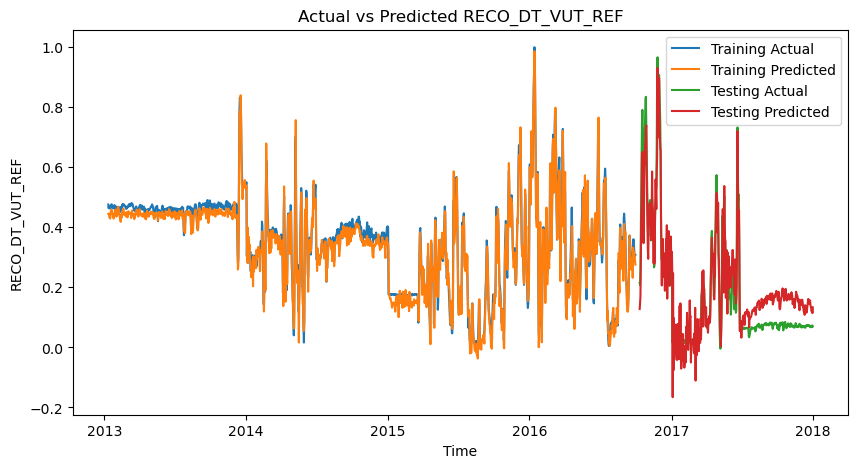

In [64]:
# Make predictions for the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

test_actual_df = y_test[:, 3]
test_pred_df = test_predictions[:, 3]
train_actual_df = y_train[:, 3]
train_pred_df = train_predictions[:, 3]

# Create DataFrames with the correct date indexes
train_pred_df = pd.DataFrame(train_pred_df[:-1], index=train_data.index[look_back+2:], columns=['RECO_DT_VUT_REF_pred'])
train_actual_df = pd.DataFrame(train_actual_df[:-1], index=train_data.index[look_back+2:], columns=['RECO_DT_VUT_REF_real'])
test_pred_df = pd.DataFrame(test_pred_df[:-1], index=test_data.index[look_back+2:], columns=['RECO_DT_VUT_REF_pred'])
test_actual_df = pd.DataFrame(test_actual_df[:-1], index=test_data.index[look_back+2:], columns=['RECO_DT_VUT_REF_real'])

# Plot index for both training and test data
plt.figure(figsize=(10,5))
plt.plot(train_actual_df.index, train_actual_df['RECO_DT_VUT_REF_real'], label='Training Actual')
plt.plot(train_pred_df.index, train_pred_df['RECO_DT_VUT_REF_pred'], label='Training Predicted')
plt.plot(test_actual_df.index, test_actual_df['RECO_DT_VUT_REF_real'], label='Testing Actual')
plt.plot(test_pred_df.index, test_pred_df['RECO_DT_VUT_REF_pred'], label='Testing Predicted')
plt.title('Actual vs Predicted RECO_DT_VUT_REF')
plt.xlabel('Time')
plt.ylabel('RECO_DT_VUT_REF')
plt.legend()
plt.show()

14/14 [==============================] - 0s 3ms/step


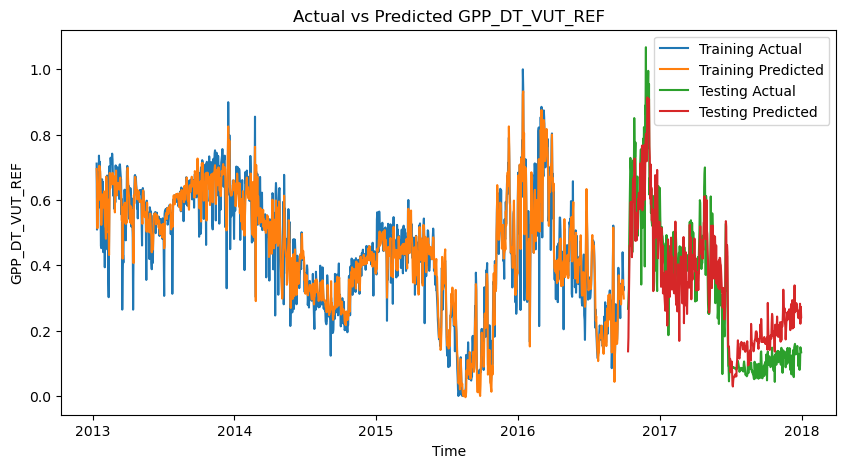

In [65]:
# Make predictions for the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

test_actual_df = y_test[:, 4]
test_pred_df = test_predictions[:, 4]
train_actual_df = y_train[:, 4]
train_pred_df = train_predictions[:, 4]

# Create DataFrames with the correct date indexes
train_pred_df = pd.DataFrame(train_pred_df[:-1], index=train_data.index[look_back+2:], columns=['GPP_DT_VUT_REF_pred'])
train_actual_df = pd.DataFrame(train_actual_df[:-1], index=train_data.index[look_back+2:], columns=['GPP_DT_VUT_REF_real'])
test_pred_df = pd.DataFrame(test_pred_df[:-1], index=test_data.index[look_back+2:], columns=['GPP_DT_VUT_REF_pred'])
test_actual_df = pd.DataFrame(test_actual_df[:-1], index=test_data.index[look_back+2:], columns=['GPP_DT_VUT_REF_real'])

# Plot index for both training and test data
plt.figure(figsize=(10,5))
plt.plot(train_actual_df.index, train_actual_df['GPP_DT_VUT_REF_real'], label='Training Actual')
plt.plot(train_pred_df.index, train_pred_df['GPP_DT_VUT_REF_pred'], label='Training Predicted')
plt.plot(test_actual_df.index, test_actual_df['GPP_DT_VUT_REF_real'], label='Testing Actual')
plt.plot(test_pred_df.index, test_pred_df['GPP_DT_VUT_REF_pred'], label='Testing Predicted')
plt.title('Actual vs Predicted GPP_DT_VUT_REF')
plt.xlabel('Time')
plt.ylabel('GPP_DT_VUT_REF')
plt.legend()
plt.show()

In [18]:
print(data)

            NEE_VUT_REF  RECO_NT_VUT_REF  GPP_NT_VUT_REF  RECO_DT_VUT_REF  \
TIMESTAMP                                                                   
2014-01-01    -0.266146          1.74024         2.01340          2.20619   
2014-01-02    -0.553166          1.73582         2.16951          2.20303   
2014-01-03     0.026655          1.72713         2.10973          2.17998   
2014-01-04    -0.266146          1.71911         1.99227          2.15843   
2014-01-05    -0.553166          1.71078         2.14448          2.13046   
...                 ...              ...             ...              ...   
2015-12-27    -1.509590          1.35432         1.69957          1.62740   
2015-12-28    -2.411430          1.37326         1.24348          1.65635   
2015-12-29    -0.636153          1.28443         1.24996          1.51726   
2015-12-30    -1.509590          1.34099         1.68624          1.60573   
2015-12-31    -2.411430          1.35060         1.22081          1.62084   